# RFCML FEA Bending Modes

In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
from M1S_tools import *

plt.jet()

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'RFCML data: Actuator IDs and locations in M1-B Coordinate System')

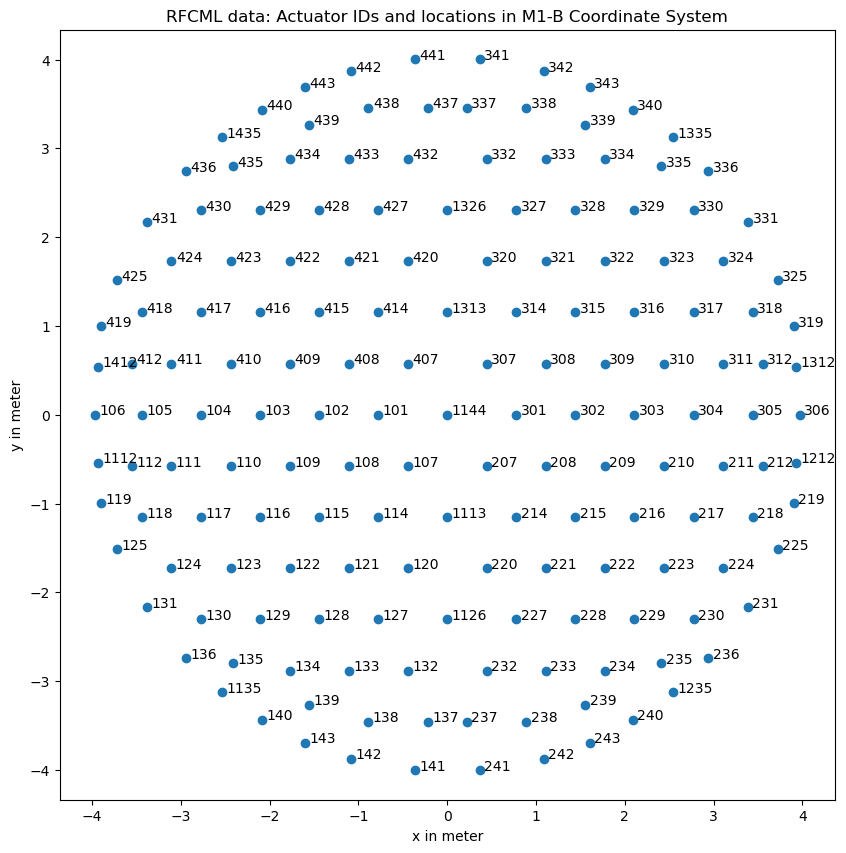

In [2]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(sax_ml, say_ml)
#plt.scatter(sax_ml, say_ml, s=100, facecolors='none', edgecolors='k')
for i in range(len(sax_ml)):
    if saID_ml[i]<1e6:
        temp = saID_ml[i]
    else:
        temp = saID_ml[i]%1e6
    plt.text(sax_ml[i]+.05, say_ml[i], '%d'%(temp))
plt.axis('equal')
plt.xlabel('x in meter')
plt.ylabel('y in meter')
plt.title('RFCML data: Actuator IDs and locations in M1-B Coordinate System')
#plt.grid()

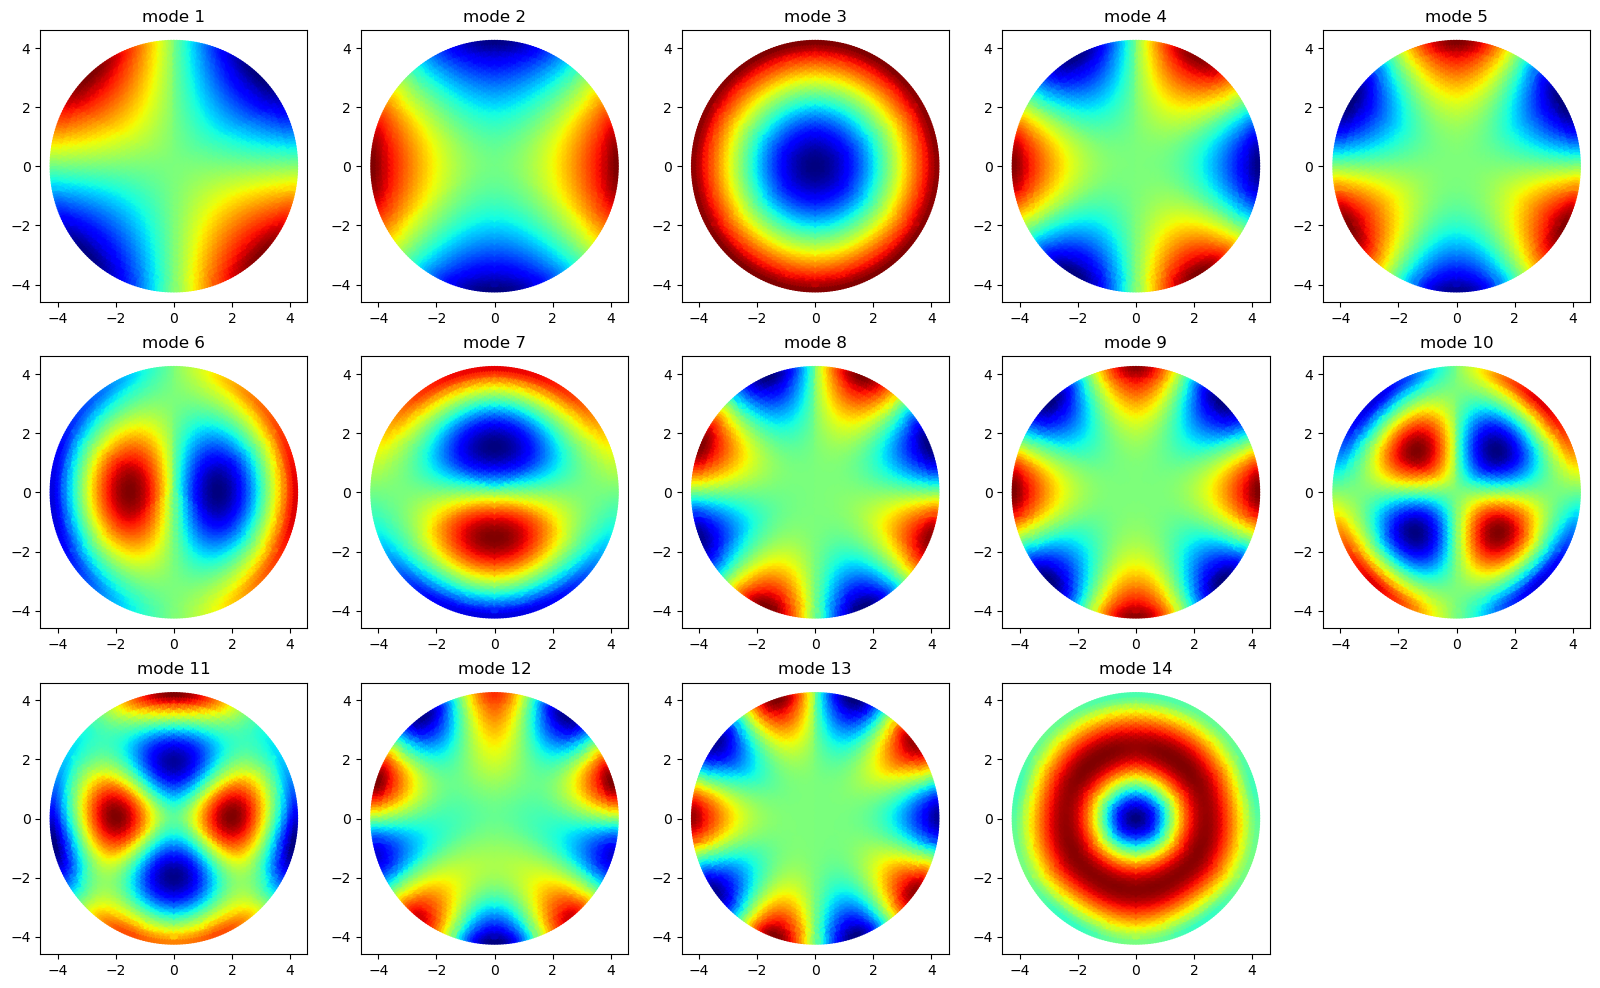

In [3]:
nrow = 3
mode_start = 1
mode_end = 14
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(mode_start,mode_start+5*nrow):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    if modeID<=mode_end:
        img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, UMat_ml[:,modeID-1])
        ax[irow][icol].set_title('mode %d'%modeID)
    else:
        ax[irow][icol].axis('off')

In [ ]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, VMat_ml[:,modeID-1])
    ax[irow][icol].set_title('mode %d, RMS = %.1fN'%(modeID, np.std(VMat_ml[:,modeID-1])))

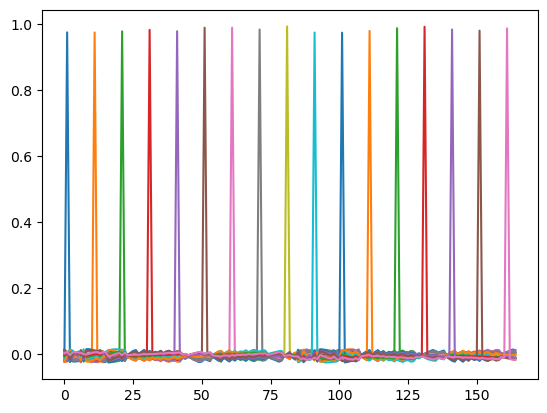

In [5]:
for i in np.arange(1,165,10):
    plt.plot(fv_ml[i,:])

### Let's try to verify that the RFCML unit load forces are linear distributions.

In [6]:
planar = fv_ml.copy()
planar[planar>0.8] = np.nan

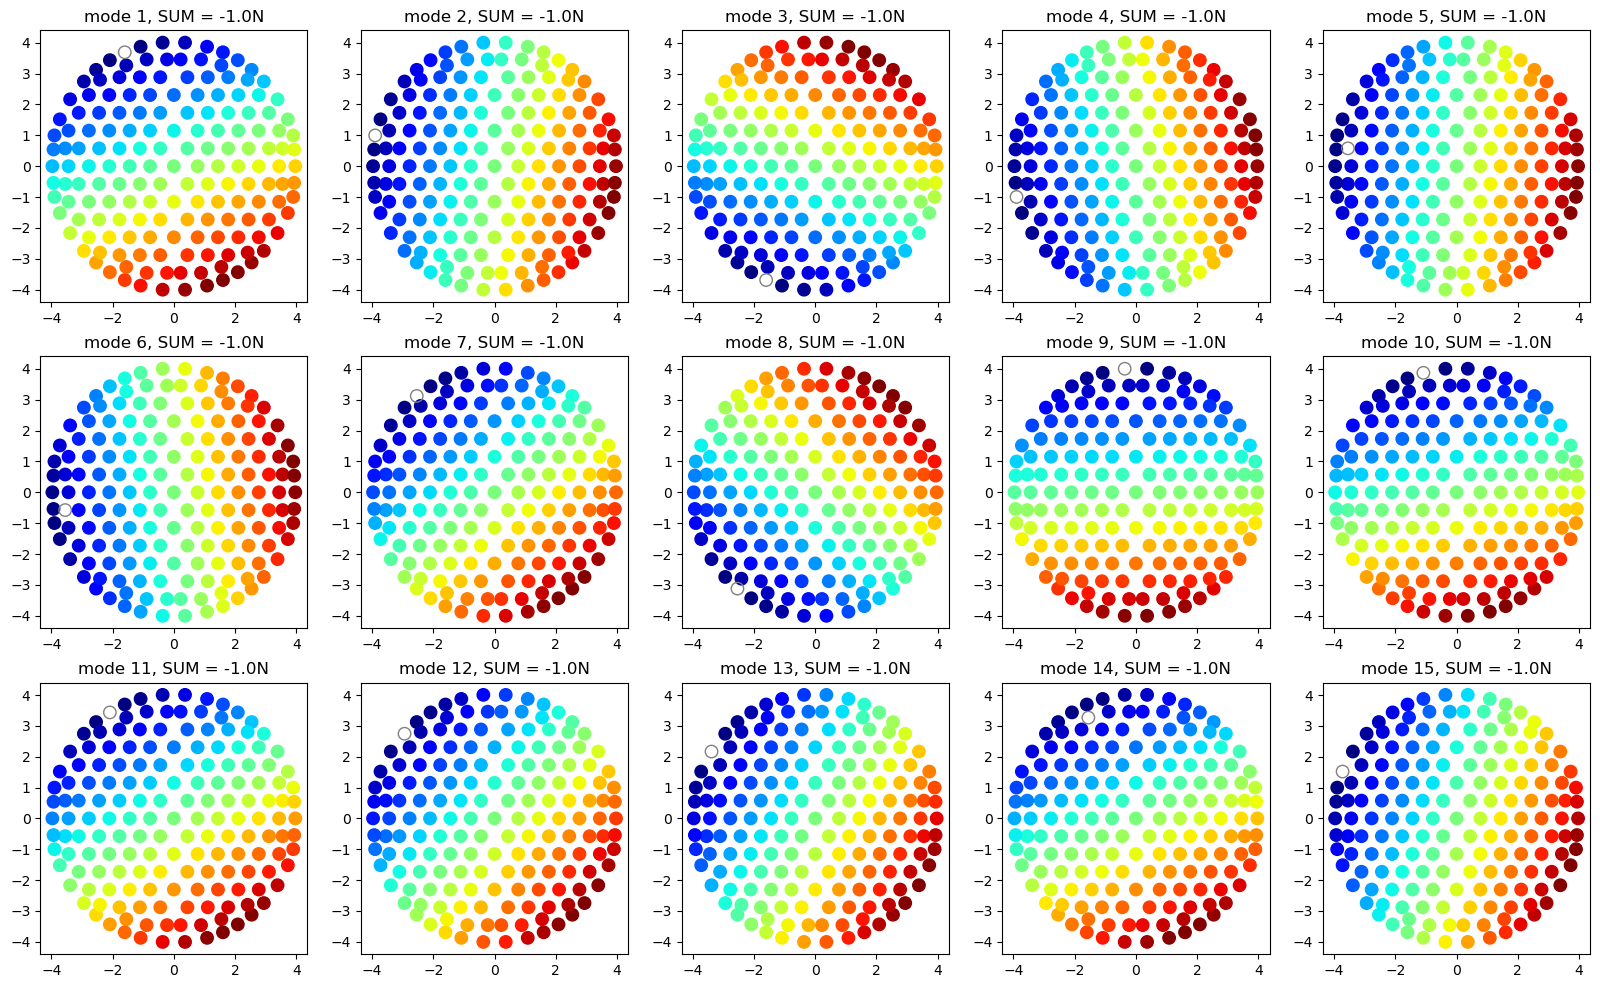

In [7]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, planar[modeID-1, :])
    idx = np.isnan(planar[modeID-1, :])
    ax[irow][icol].scatter(sax_ml[idx], say_ml[idx],80, edgecolors='grey', facecolors='none')
    ax[irow][icol].set_title('mode %d, SUM = %.1fN'%(modeID, np.sum(planar[modeID-1, ~idx])))

In [8]:
#check BM normalization
for i in np.arange(1,165,10):
    print('%.2f, %.2f, %+.2f'%(np.sqrt(np.sum(UMat_ml[:,i]**2)/UMat_ml.shape[0] ), 
          np.std(UMat_ml[:,i]), np.mean(UMat_ml[:,i])))

1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00


In [9]:
#check BM force normalization
for i in np.arange(0,16):
    print('%3d, %8.1f, %8.1f, %8.1f, %+.2f'%(i, np.sqrt(np.sum(VMat_ml[:,i]**2)/VMat_ml.shape[0] ), 
                                         np.sqrt(np.sum(VMat_ml[:,i]**2) ), 
          np.std(VMat_ml[:,i]), np.mean(VMat_ml[:,i])))

  0,      6.6,     85.0,      6.6, -0.00
  1,      6.7,     85.9,      6.7, -0.00
  2,     16.4,    210.3,     16.4, +0.00
  3,     34.8,    447.1,     34.8, +0.00
  4,     37.4,    480.7,     37.4, +0.00
  5,     76.4,    981.3,     76.4, +0.00
  6,     79.2,   1017.4,     79.2, -0.00
  7,    103.5,   1329.4,    103.5, +0.00
  8,    105.0,   1349.1,    105.0, +0.00
  9,    207.5,   2665.2,    207.5, +0.00
 10,    214.4,   2753.9,    214.4, -0.00
 11,    219.8,   2823.8,    219.8, -0.00
 12,    226.9,   2914.8,    226.9, +0.00
 13,    237.0,   3043.9,    237.0, +0.00
 14,    391.2,   5025.1,    391.2, -0.00
 15,    412.9,   5303.5,    412.9, -0.00


## Let's calculate the surface slopes of the bending modes

In [10]:
#BM surf nodes (as in the ML FEA) are not on a regular grid.
# this gives a approximate sense of grid size
np.sqrt(nodex_ml.shape[0])

83.61220006673668

In [11]:
pixSize = 100e-3 #100mm, so that 83 pixels cover 8.3m
vec = np.arange(np.min(nodex_ml), np.max(nodex_ml)+pixSize, pixSize)
xfit, yfit = np.meshgrid(vec, vec)
print(xfit.shape)
rfit = np.sqrt(xfit**2+yfit**2)
mask = np.ones_like(rfit)
mask[rfit>np.max(xfit)]=np.nan

(85, 85)


In [12]:
from scipy.interpolate import griddata

done


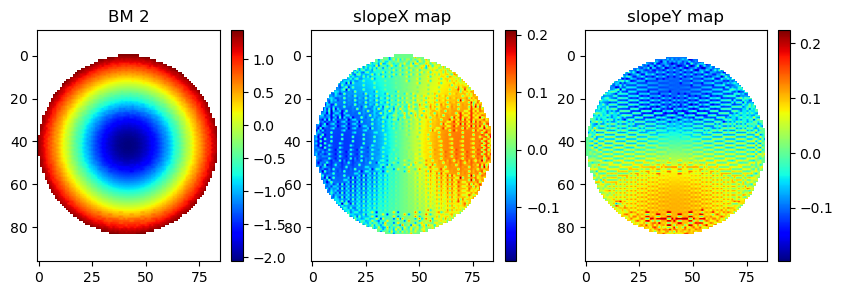

In [13]:
slopeMax = np.zeros(UMat_ml.shape[1])
slopeRms = np.zeros(UMat_ml.shape[1])
fig, ax = plt.subplots(1,3, figsize=(10,3))
for i in np.arange(46):
    #print(i, end = ' ')
    dd = griddata(np.hstack((nodex_ml, nodey_ml)), UMat_ml[:,i], (xfit, yfit), method='nearest')
    slopeX = dd*mask - np.roll(dd*mask,1,axis=1)
    slopeY = dd*mask - np.roll(dd*mask,1,axis=0)
    slope = np.sqrt(slopeX**2+slopeY**2)

    slopeMax[i] = np.max(slope[~np.isnan(slope)])
    slopeRms[i] = np.sqrt(np.mean((slope[~np.isnan(slope)]**2)))
    #print(slopeMax[i], slopeRms[i], np.std(slope[~np.isnan(slope)]))
    if i==2:
        img = ax[0].imshow(dd*mask)
        ax[0].axis('equal')
        ax[0].set_title('BM %d'%i)
        fig.colorbar(img, ax=ax[0]);

        img = ax[1].imshow(slopeX)
        ax[1].axis('equal')
        ax[1].set_title('slopeX map')
        fig.colorbar(img, ax=ax[1]);
        
        img = ax[2].imshow(slopeY)
        ax[2].axis('equal')
        ax[2].set_title('slopeY map')
        fig.colorbar(img, ax=ax[2]);
print('done')

In [14]:
slopeMax

array([0.21778015, 0.20650655, 0.23923238, 0.35493277, 0.34702987,
       0.39418266, 0.43700434, 0.48036811, 0.42696461, 0.55762574,
       0.54293518, 0.5993134 , 0.57612391, 0.63652305, 0.74456805,
       0.74362535, 0.60923588, 0.60849628, 0.87711626, 0.76856207,
       0.87058985, 0.88449392, 0.72166202, 0.79320918, 0.79675572,
       0.95135281, 1.22209649, 1.03397046, 0.99429906, 0.88642533,
       0.8181898 , 1.05214723, 1.10814985, 0.89865886, 1.1490876 ,
       1.17323997, 1.2375403 , 0.94087253, 1.04217953, 1.34698748,
       1.4288302 , 1.20256879, 1.23725918, 1.47240122, 1.25352445,
       1.73986896, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
slopeRms

array([0.08775895, 0.0870179 , 0.1127763 , 0.1186739 , 0.11648959,
       0.15328484, 0.14917728, 0.14381404, 0.14827069, 0.18390973,
       0.18944201, 0.17238188, 0.17528781, 0.1969322 , 0.20039316,
       0.20132909, 0.22410589, 0.21788294, 0.23751608, 0.2298394 ,
       0.2270773 , 0.22895952, 0.25248767, 0.25650663, 0.26663522,
       0.2738899 , 0.27686369, 0.25626284, 0.25469652, 0.28782973,
       0.28643574, 0.28228143, 0.30934911, 0.30210753, 0.3147656 ,
       0.29328391, 0.31399853, 0.32022159, 0.3185783 , 0.31314957,
       0.31255635, 0.33754209, 0.34435255, 0.3525744 , 0.35978214,
       0.35532493, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### We want the forces to be per puck, instead of per actuator

We need to map the ML force sets (165x1 vectors) to GMT force sets (170x1 vectors) then we can divide each actuator force by the number of pucks properly.

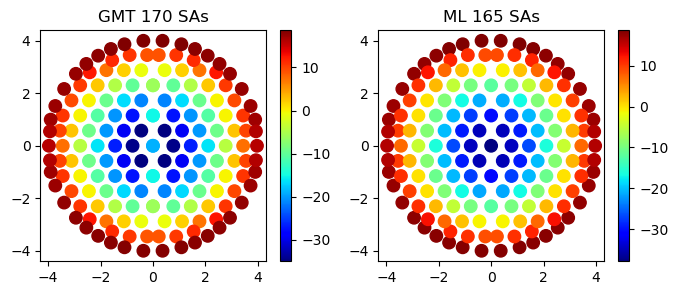

In [16]:
#check that they are visually the same
fig, ax = plt.subplots(1,2, figsize=(8,3))
img = ax[0].scatter(sax, say, 80, c=mlFvec2gmtFvec(VMat_ml[:,2]))
fig.colorbar(img, ax=ax[0])
ax[0].axis('equal')
ax[0].set_title('GMT 170 SAs')
img = ax[1].scatter(sax_ml, say_ml, 80, c=VMat_ml[:,2])
fig.colorbar(img, ax=ax[1])
ax[1].set_title('ML 165 SAs')
ax[1].axis('equal');

## Ready to make a table

In [17]:
c = np.ones_like(slopeMax)
print('modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)')
for i in np.arange(46):
    gmtF = mlFvec2gmtFvec(VMat_ml[:,i])
    if i<14:
        c[i] = 0.5 #make 500nm surf RMS
    elif i<27:
        c[i] = 100./np.std(gmtF/npuck) #scale force down to 100N
    elif i<27:
        c[i] = 60./np.std(gmtF/npuck) #scale force down to 60N
    else:
        c[i] = 80./np.std(gmtF/npuck) #scale force down to 60N
    #overwrite c[i] above
    #c[i] = np.min([147./np.max(gmtF/npuck), 0.5])
    print('%3d, %10.0f, %12.0f,    %8.0f,    %8.0f,           %8.0f,           %8.0f'%(i+1, #c[i],
                                                   c[i]*1000*np.std(UMat_ml[:,i]), c[i]*1000*np.max(UMat_ml[:,i]),
                                                    c[i]*np.std(gmtF/npuck), c[i]*np.max(gmtF/npuck), 
                                                    c[i]*1000*slopeRms[i], c[i]*1000*slopeMax[i]
                                                   ))

modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)
  1,        500,         1144,           2,           6,                 44,                109
  2,        500,         1152,           2,           6,                 44,                103
  3,        500,          719,           4,           9,                 56,                120
  4,        500,         1253,          11,          34,                 59,                177
  5,        500,         1214,          10,          27,                 58,                174
  6,        500,         1113,          16,          48,                 77,                197
  7,        500,         1090,          17,          48,                 75,                219
  8,        500,         1307,          31,         108,                 72,                240
  9,        500,         1284,          29,          64,                 74,                213
 10,        500,         1093, 

## We deal with the single actuator IFs next

In [18]:
IF_ml = Afn_ml @ fv_ml

In [19]:
saID_ml.shape

(165,)

In [20]:
TR_IDs = saID[0:50] #placeholder for the actuator ID to be provided by Trupti
#TR_IDs = saID[3:50] #for testing

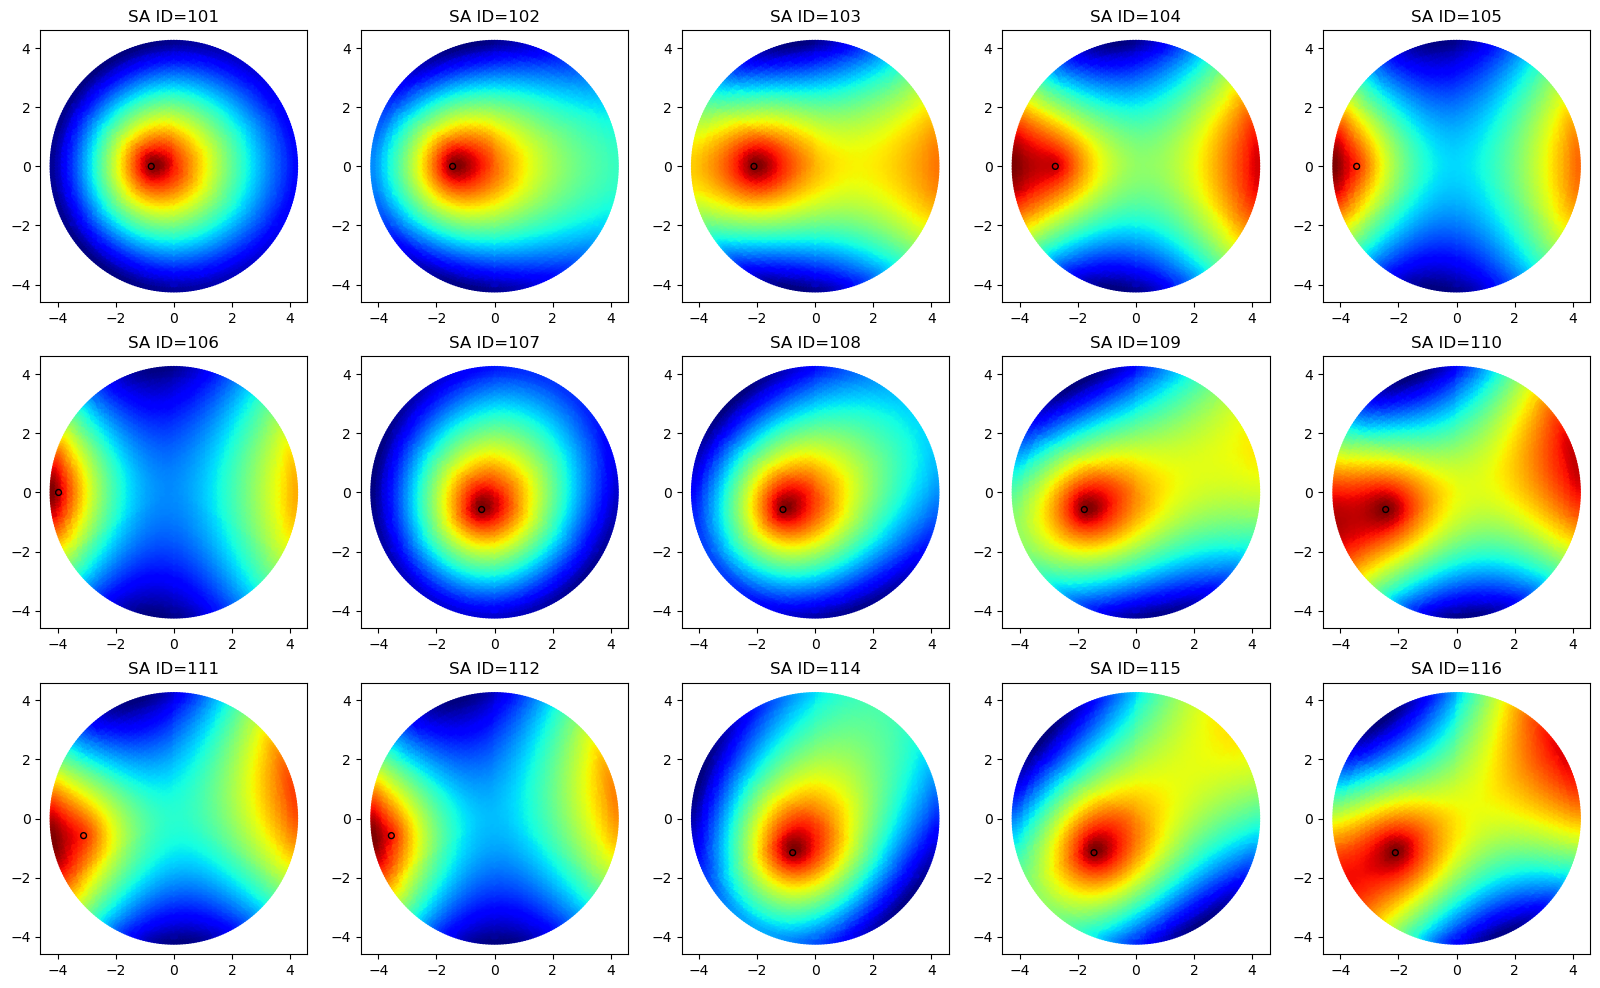

In [21]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1): #this ID is GMT ID.
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    modeID_ml = np.where(saID_ml == TR_IDs[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
    img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, IF_ml[:,modeID_ml-1])
    ax[irow][icol].set_title('SA ID=%d'%saID_ml[modeID_ml-1])
    circle = plt.Circle((sax_ml[modeID_ml-1], say_ml[modeID_ml-1]),0.1, fill=False)
    ax[irow][icol].add_artist(circle)

done


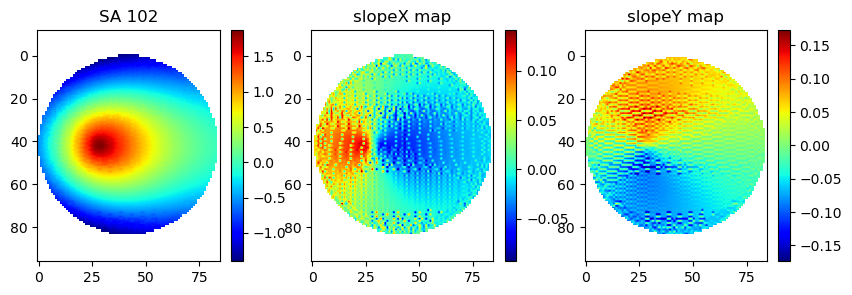

In [22]:
slopeMax = np.zeros(IF_ml.shape[1])
slopeRms = np.zeros(IF_ml.shape[1])
fig, ax = plt.subplots(1,3, figsize=(10,3))
for modeID in np.arange(1,46):
    #print(i, end = ' ')
    modeID_ml = np.where(saID_ml == TR_IDs[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
    dd = griddata(np.hstack((nodex_ml, nodey_ml)), IF_ml[:,modeID_ml-1], (xfit, yfit), method='nearest')
    slopeX = dd*mask - np.roll(dd*mask,1,axis=1)
    slopeY = dd*mask - np.roll(dd*mask,1,axis=0)
    slope = np.sqrt(slopeX**2+slopeY**2)

    slopeMax[modeID-1] = np.max(slope[~np.isnan(slope)])
    slopeRms[modeID-1] = np.sqrt(np.mean((slope[~np.isnan(slope)]**2)))
    #print(slopeMax[i], slopeRms[i], np.std(slope[~np.isnan(slope)]))
    if modeID==2:
        img = ax[0].imshow(dd*mask)
        ax[0].axis('equal')
        ax[0].set_title('SA %d'%saID_ml[modeID_ml-1])
        fig.colorbar(img, ax=ax[0]);

        img = ax[1].imshow(slopeX)
        ax[1].axis('equal')
        ax[1].set_title('slopeX map')
        fig.colorbar(img, ax=ax[1]);
        
        img = ax[2].imshow(slopeY)
        ax[2].axis('equal')
        ax[2].set_title('slopeY map')
        fig.colorbar(img, ax=ax[2]);
print('done')

In [23]:
c = np.ones_like(slopeMax)
c *= 300 #350N force on each
print('SA ID, Unit F (N), F RMS(N), F MAX(N), S RMS(nm),    S MAX(nm), slope MAX (nm/100mm), slope RMS (nm/100mm)')
for modeID in np.arange(1,15+1):
    gmtF = mlFvec2gmtFvec(fv_ml[:,modeID_ml-1])
    #if i<9:
    #    c[i] = 0.5 #make 500nm surf RMS
    #elif i<18:
    #    c[i] = 100./np.std(VMat_ml[:,i]) #scale force down to 100N
    #elif i<27:
    #    c[i] = 60./np.std(VMat_ml[:,i]) #scale force down to 60N
    #else:
    #    c[i] = 40./np.std(VMat_ml[:,i]) #scale force down to 60N
    modeID_ml = np.where(saID_ml == TR_IDs[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
    
    #RFCML mode shapes are in nanometers
    print('%6d, %6.1f, %8.0f, %8.0f,    %8.0f,    %8.0f,      %8.0f,      %8.0f'%(saID_ml[modeID_ml-1], 
                                                                                  c[modeID-1],
                                                    c[modeID-1]*np.sqrt(np.mean((gmtF/npuck)**2)), 
                                                    c[modeID-1]*np.max(gmtF/npuck), 
                                                   c[modeID-1]*np.std(IF_ml[:,modeID_ml-1]), 
                                                    c[modeID-1]*np.max(IF_ml[:,modeID_ml-1]),
                                                    c[modeID-1]*slopeMax[modeID-1], 
                                                    c[modeID-1]*slopeRms[modeID-1]
                                                   ))

SA ID, Unit F (N), F RMS(N), F MAX(N), S RMS(nm),    S MAX(nm), slope MAX (nm/100mm), slope RMS (nm/100mm)
   101,  300.0,        8,       99,         240,         677,            61,            27
   102,  300.0,        8,       99,         207,         562,            58,            23
   103,  300.0,        8,       99,         212,         473,            59,            21
   104,  300.0,        8,       99,         293,         655,            64,            26
   105,  300.0,        8,       98,         424,        1303,           113,            38
   106,  300.0,        8,       98,         545,        1936,           179,            51
   107,  300.0,       11,      146,         244,         684,            66,            27
   108,  300.0,        8,       99,         217,         598,            64,            24
   109,  300.0,        8,       99,         204,         497,            56,            21
   110,  300.0,        8,       99,         255,         498,            6

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


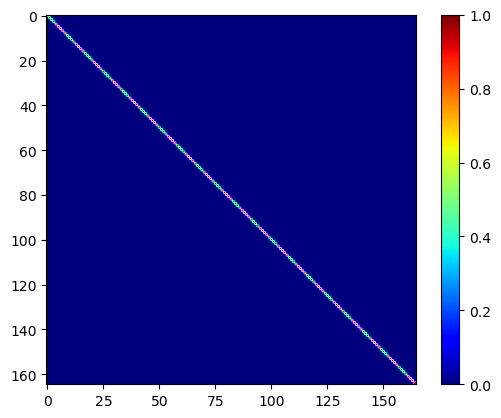

In [24]:
#verify unitarity of the U matrix
plt.imshow(UMat_ml.transpose() @ UMat_ml/UMat_ml.shape[0])
plt.colorbar()

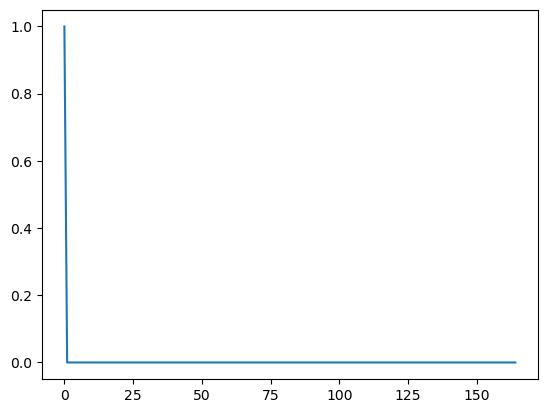

In [25]:
#if we decompose BM 1 into BMs, we should get [1, 0, 0, ...., 0]
aa = UMat_ml.transpose() /UMat_ml.shape[0] @UMat_ml[:,0]
plt.plot(aa)

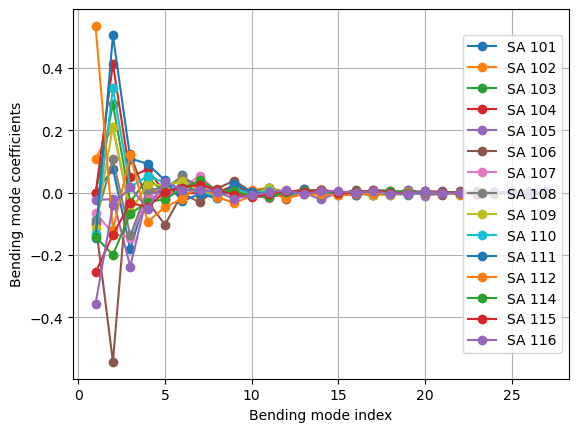

In [26]:
for modeID in range(1,15+1):
    
    modeID_ml = np.where(saID_ml == TR_IDs[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
    
    #IF_ml is in nanometer. bending modes have been converted into microns
    aa = UMat_ml.transpose() /UMat_ml.shape[0] @ (IF_ml[:,modeID_ml]*1e-3*c[modeID-1])
    plt.plot(np.arange(1,27+1), aa[:27],'-o', label='SA %d'%saID_ml[modeID_ml-1])
plt.xlabel('Bending mode index')
plt.ylabel('Bending mode coefficients')
plt.legend(loc='right')
plt.grid();